# An Introduction to Statical Learning
## 3. Linear Regression
### Excercises - Applied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 8. This question involves the use of simple linear regression on the Auto data set.

In [2]:
auto = sm.datasets.get_rdataset('Auto', 'ISLR')

In [3]:
print(auto.__doc__)

==== ===============
Auto R Documentation
==== ===============

Auto Data Set
-------------

Description
~~~~~~~~~~~

Gas mileage, horsepower, and other information for 392 vehicles.

Usage
~~~~~

::

   Auto

Format
~~~~~~

A data frame with 392 observations on the following 9 variables.

``mpg``
   miles per gallon

``cylinders``
   Number of cylinders between 4 and 8

``displacement``
   Engine displacement (cu. inches)

``horsepower``
   Engine horsepower

``weight``
   Vehicle weight (lbs.)

``acceleration``
   Time to accelerate from 0 to 60 mph (sec.)

``year``
   Model year (modulo 100)

``origin``
   Origin of car (1. American, 2. European, 3. Japanese)

``name``
   Vehicle name

The orginal data contained 408 observations but 16 observations with
missing values were removed.

Source
~~~~~~

This dataset was taken from the StatLib library which is maintained at
Carnegie Mellon University. The dataset was used in the 1983 American
Statistical Association Exposition.

References

###  (a) Linear Regresion mpg On horsepower

In [3]:

# data
dauto = auto.data

x = dauto['horsepower']
y = dauto['mpg'].values.reshape(-1, 1)

X = sm.add_constant(x)
est = sm.OLS(y, X)
resp = est.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           7.03e-81
Time:                        08:16:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

### i. Is there a relationship between the predictor and the response? 

Yes, we can confirm that null-hypothesis don't apply, because p-value is 0. And even if we have a "small" coef, the std error is small.

### ii. How strong is the relationship between the predictor and the response?

The correlation/R2 is 0.606, hence 60,6% of the reponse is predicted with horsepower. That's not optimal but is a relationship that we can work with depending of the data.

### iii. Is the relationship between the predictor and the response positive or negative?

Is negative, the coef of horsepower is -0.1578.

### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

The predict with horsepower = 98 is mpg = 24.47, with a interval of confidence (95%) [14.81, 34.12]

In [5]:
resp.get_prediction([[1,98]]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


## (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

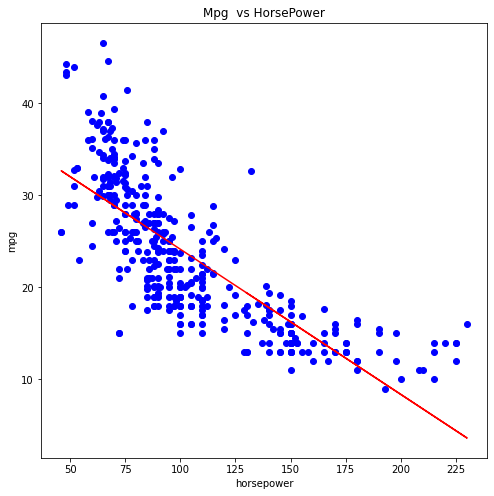

In [6]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y, 'bo')
ax.plot(x, resp.predict(),color='red')
ax.set(title="Mpg  vs HorsePower",
      xlabel="horsepower",
      ylabel="mpg");

## (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

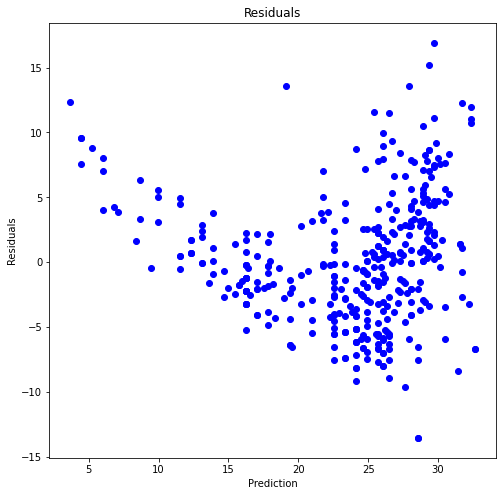

In [7]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

### Polynomial Modelad - Horsepower 

In [125]:
def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha

x1= dauto[['horsepower']].copy()
x1 = sm.add_constant(ortho_poly_fit(x1.values,2)[0][:,1:])
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y1, x1)
resp = model.fit()
print(resp.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           5.40e-99
Time:                        12:12:09   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.221    106.130      0.0

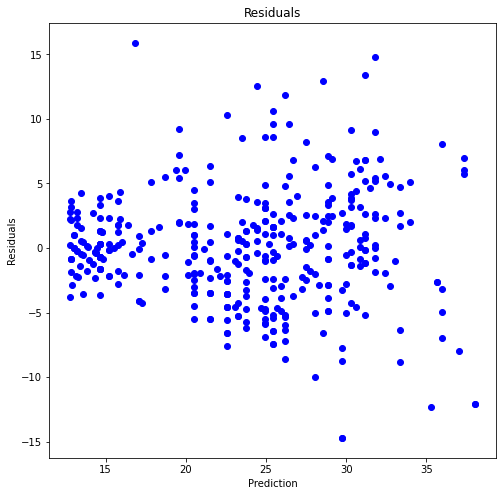

In [126]:
# Residuals 

fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

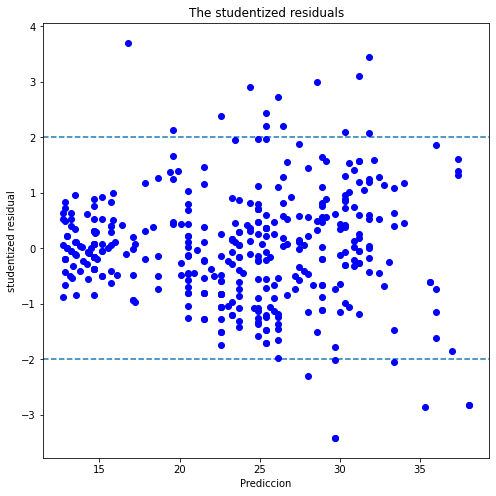

In [127]:
 influence = resp.get_influence()  
resid_student = influence.resid_studentized_external

fig, ax = plt.subplots(figsize = (8, 8))
plt.axhline(3, linestyle="--")
plt.axhline(-3, linestyle="--")
x1 = resp.predict();

ax.plot(x1, resid_student, 'bo')
ax.set(title="The studentized residuals",
      xlabel="Prediccion",
      ylabel="studentized residual");

In [10]:
# Polynomial 3er grado
## We observe that did not explain to much the model, R2 still the same. And the cubic term 
## have true null-hypothesis
## Se observa que no añade mas explicacion de la data (R2), y el termino cubico cumple null-hypothesis 
x1= dauto[['horsepower']].copy()
x1 = sm.add_constant(ortho_poly_fit(x1.values,3)[0][:,1:])
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y1, x1)
resp = model.fit()
print(resp.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.5
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           8.41e-98
Time:                        10:00:20   Log-Likelihood:                -1132.8
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.221    106.105      0.0

In [10]:
# Logaritmic Model - Horspower 
## There's no significant variation of R2.
## R2 no hay variacion signficativa de R2

m= dauto[['horsepower']].copy()
n= np.log(m)
    
x1 = sm.add_constant(n)
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y1, n)
resp = model.fit()
print(resp.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              2391.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                   1.10e-168
Time:                        08:31:15   Log-Likelihood:                         -1428.8
No. Observations:                 392   AIC:                                      2860.
Df Residuals:                     391   BIC:                                      2864.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

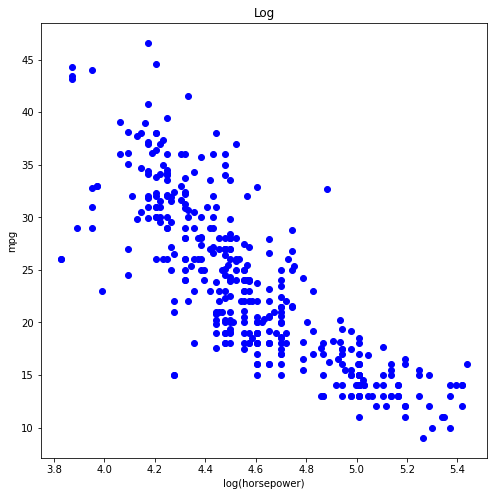

In [9]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(n, y1, 'bo')
ax.set(title="Log",
      xlabel="log(horsepower)",
      ylabel="mpg");

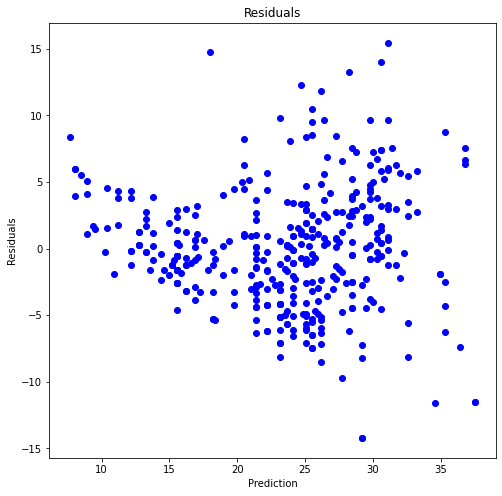

In [5]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

In [13]:
# Model horsepower using log(1/m)
## There's no significant variation of R2.
## R2 no sufre cambio significativo
m= dauto[['horsepower']].copy()
n= np.log(1/m)
    
x1 = sm.add_constant(n)
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y1, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.70e-95
Time:                        10:00:23   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.6997      3.050     35.644      0.0

In [14]:
# Model of Horsepower squeared

m= dauto[['horsepower']].copy()
n= np.sqrt(m)
    
x1 = sm.add_constant(n)
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y1, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           2.02e-89
Time:                        10:00:23   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7052      1.349     43.516      0.0

## 9. This question involves the use of multiple linear regression on the Auto data set.

### (a) Plot Scatter Matrix

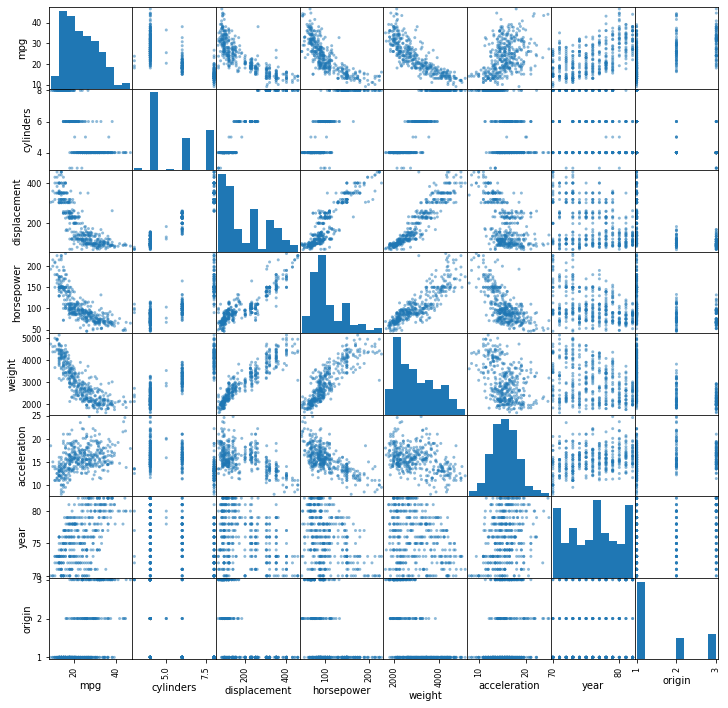

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(dauto, figsize = (12, 12));

In [12]:
ddauto = dauto.drop(['name'], axis=1)

### (b) Correlation Matrix

In [17]:
ddauto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [18]:
# Getting correlation matrix.
 
corr = ddauto.corr() 
corr.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c) Model with all variables

In [19]:

x1 = sm.add_constant(ddauto.drop(['mpg'], axis=1))
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          2.04e-139
Time:                        10:00:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [20]:
# Model mpg vs displacement 

x1 = sm.add_constant(ddauto['displacement'])
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.66e-90
Time:                        10:00:56   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1206      0.494     71.033   

In [21]:
# Model mpg vs cylinders

x1 = sm.add_constant(ddauto['cylinders'])
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.31e-80
Time:                        10:00:57   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     390   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9155      0.835     51.404      0.0

In [22]:
# Model mpg vs horsepower-displacement-cylinders

x1 = sm.add_constant(ddauto[['horsepower','displacement','cylinders']])
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           3.49e-92
Time:                        10:00:57   Log-Likelihood:                -1145.9
No. Observations:                 392   AIC:                             2300.
Df Residuals:                     388   BIC:                             2316.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.3053      1.325     29.673   

In [23]:
## Model mpv vs horsepower-displacement with interaction term

x1 = sm.add_constant(ddauto[['horsepower','displacement']])
x1['horsepower:displacement'] = ddauto['horsepower']*ddauto['displacement']
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     381.0
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          3.00e-115
Time:                        10:00:57   Log-Likelihood:                -1092.1
No. Observations:                 392   AIC:                             2192.
Df Residuals:                     388   BIC:                             2208.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
# Model with al variables involve, with interraction term horsepower:displacement

x1 = sm.add_constant(ddauto.drop(['mpg'], axis=1))
x1['horsepower:displacement'] = ddauto['horsepower']*ddauto['displacement']
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     303.1
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.59e-160
Time:                        10:24:42   Log-Likelihood:                -970.71
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     383   BIC:                             1995.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

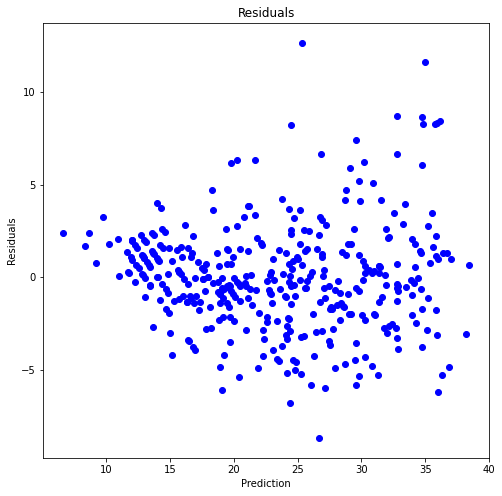

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

In [60]:
# Model with al variables involve, with interraction term horsepower:displacement
# With out acceleration
x1 = sm.add_constant(ddauto.drop(['mpg','acceleration'], axis=1))
x1['horsepower:displacement'] = ddauto['displacement']*ddauto['horsepower']
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     341.6
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.28e-160
Time:                        10:35:49   Log-Likelihood:                -973.52
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     384   BIC:                             1995.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

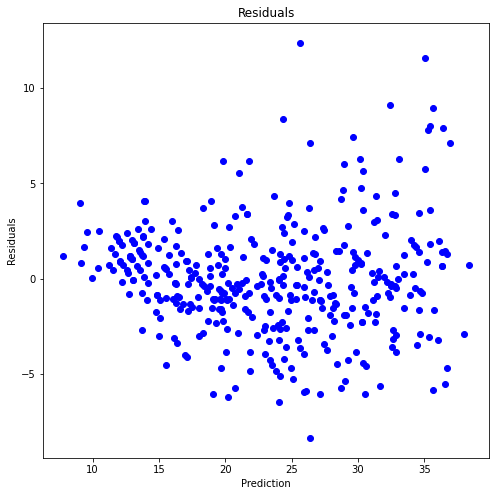

In [61]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

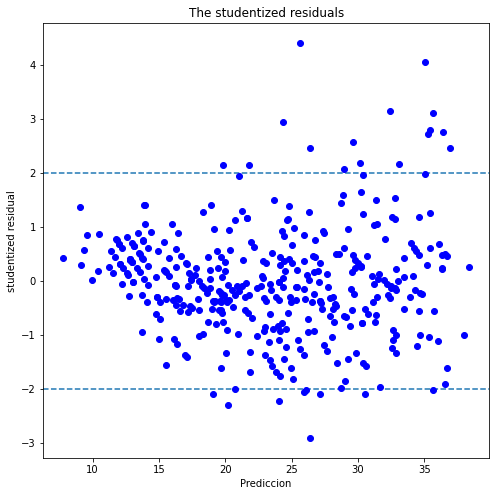

In [70]:
 influence = resp.get_influence()  
resid_student = influence.resid_studentized_external

fig, ax = plt.subplots(figsize = (8, 8))
plt.axhline(2, linestyle="--")
plt.axhline(-2, linestyle="--")
x1 = resp.predict();

ax.plot(x1, resid_student, 'bo')
ax.set(title="The studentized residuals",
      xlabel="Prediccion",
      ylabel="studentized residual");

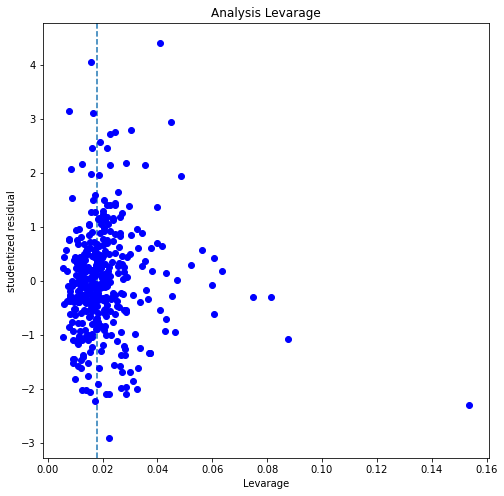

In [66]:

leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize = (8, 8))
plt.axvline(7/392, linestyle="--")

ax.plot(leverage, resid_student, 'bo')
ax.set(title="Analysis Levarage",
      xlabel="Levarage",
      ylabel="studentized residual");

#### We can observe the effect of collinearity


In [76]:
# Model mpg vs horsepower-displacement-cylinders-weight

x1 = sm.add_constant(ddauto[['horsepower','displacement','cylinders','weight']])
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     234.2
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          6.18e-102
Time:                        11:16:22   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     387   BIC:                             2270.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.7568      1.520     30.102   

In [81]:
# Model mpg vs horsepower-displacement-weight

x1 = sm.add_constant(ddauto[['horsepower','cylinders','weight']])
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     313.1
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          3.22e-103
Time:                        11:17:10   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     388   BIC:                             2264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7368      0.796     57.461      0.0

In [88]:
# Model mpg vs horsepower-displacement-weight with an interaction term cylinders:horsepower

x1 = sm.add_constant(ddauto[['horsepower','cylinders','weight']])
x1['horsepower:cylinders'] = ddauto['horsepower']*ddauto['cylinders']
y1 = dauto['mpg'].values.reshape(-1, 1)

model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     295.3
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          3.80e-116
Time:                        11:28:03   Log-Likelihood:                -1086.9
No. Observations:                 392   AIC:                             2184.
Df Residuals:                     387   BIC:                             2204.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.9598 

In [105]:
# Model with al variables involve, without displacement. With interaction horsepower:cylinders

x1 = sm.add_constant(ddauto.drop(['mpg','displacement'], axis=1))
x1['horsepower:cylinders'] = ddauto['horsepower']*ddauto['cylinders']
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     342.9
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          7.08e-161
Time:                        11:46:21   Log-Likelihood:                -972.91
No. Observations:                 392   AIC:                             1962.
Df Residuals:                     384   BIC:                             1994.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5993 

In [119]:
# Model with all variables, without displacement and weight. With interaction term horsepower:cylinders

x1 = sm.add_constant(ddauto.drop(['mpg','displacement','weight'], axis=1))
x1['horsepower:cylinders'] = ddauto['horsepower']*ddauto['cylinders']
y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     346.8
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          7.65e-152
Time:                        12:05:16   Log-Likelihood:                -997.23
No. Observations:                 392   AIC:                             2008.
Df Residuals:                     385   BIC:                             2036.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   23.7061 

In [141]:
# Model with all variables, without displacement and weight. With interaction term horsepower:cylinders

x1 = ddauto.drop(['mpg','displacement','weight'], axis=1)
x1 = sm.add_constant(x1)
x1['horsepower:cylinders'] = ddauto['horsepower']*ddauto['cylinders']
x1 = np.sqrt(x1)


y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     352.6
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          5.14e-153
Time:                        12:29:38   Log-Likelihood:                -994.47
No. Observations:                 392   AIC:                             2003.
Df Residuals:                     385   BIC:                             2031.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   57.9851 

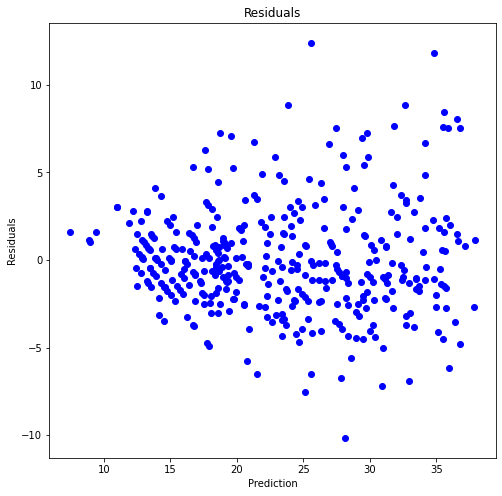

In [142]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

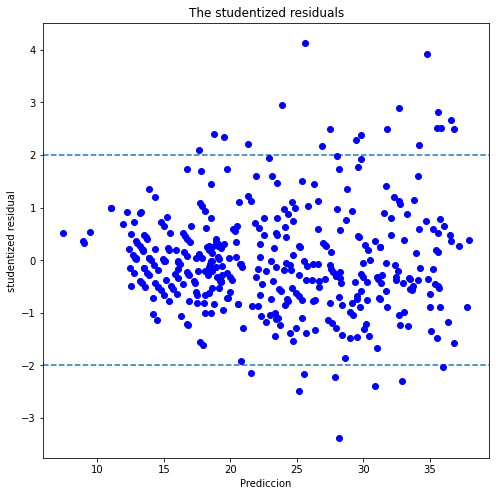

In [143]:
 influence = resp.get_influence()  
resid_student = influence.resid_studentized_external

fig, ax = plt.subplots(figsize = (8, 8))
plt.axhline(2, linestyle="--")
plt.axhline(-2, linestyle="--")
x1 = resp.predict();

ax.plot(x1, resid_student, 'bo')
ax.set(title="The studentized residuals",
      xlabel="Prediccion",
      ylabel="studentized residual");

In [13]:
# Model with all variables, without displacement and weight. With interaction term horsepower:cylinders
# log(horsepower)
x1 = ddauto.drop(['mpg','displacement','weight','horsepower'], axis=1)
x1['log(horsepower)'] = np.log(ddauto['horsepower'])
x1 = sm.add_constant(x1)
x1['horsepower:cylinders'] = ddauto['horsepower']*ddauto['cylinders']
x1 = np.sqrt(x1)


y1 = dauto['mpg'].values.reshape(-1, 1)
model = sm.OLS(y, x1)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     354.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.52e-153
Time:                        08:35:17   Log-Likelihood:                -993.75
No. Observations:                 392   AIC:                             2001.
Df Residuals:                     385   BIC:                             2029.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  204.2117 

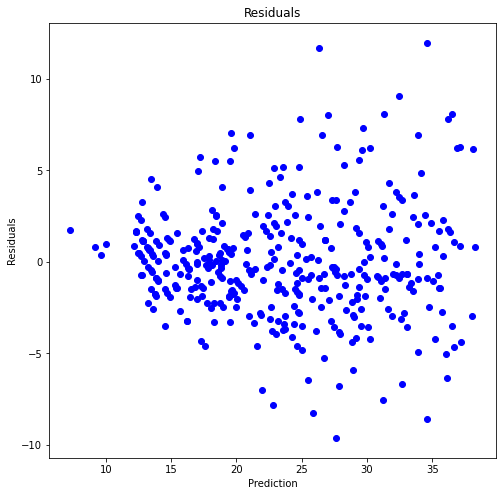

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = resp.predict();
y1 = resp.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediction",
      ylabel="Residuals");

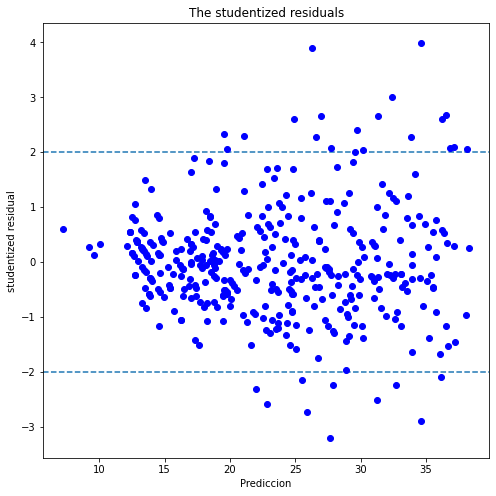

In [15]:
 influence = resp.get_influence()  
resid_student = influence.resid_studentized_external

fig, ax = plt.subplots(figsize = (8, 8))
plt.axhline(2, linestyle="--")
plt.axhline(-2, linestyle="--")
x1 = resp.predict();

ax.plot(x1, resid_student, 'bo')
ax.set(title="The studentized residuals",
      xlabel="Prediccion",
      ylabel="studentized residual");